In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

words = open("data/names.txt", "r").read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

## mapping

In [ ]:
chars = sorted(list(set("".join(words))))
stoi = {char: i+1 for i, char in enumerate(chars)}
stoi["."] = 0

itos = {i: char for char, i in stoi.items()}

## buidling dataset with train, val, test -split

In [470]:
block_size = 5
import random
def build_dataset(words):
    
    X, Y = [], []

    for word in words:
        context = [0] * block_size
        for char in word + ".":
            idx = stoi[char]
            X.append(context)
            Y.append(idx)
            context = context[1:] + [idx]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y


random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

## Embedding

In [105]:
C = torch.randn((27,2))
C.shape

torch.Size([27, 2])

In [139]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [140]:
X[1]

tensor([0, 0, 5])

In [141]:
emb[1]

tensor([[-1.1077,  1.3745],
        [-1.1077,  1.3745],
        [ 1.6346,  0.0767]])

## Hidden layer + tanh

In [142]:
W1 = torch.randn((6, 100)) #input 1x3 -> Embedding -> 1x6 -> W: 6:m (wir nehme 100)
b1 = torch.randn(100)

In [143]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape # wir brauchen batch x 6, aktuell haben wir batch x 3 x 2 -> concatenation der embeddings über alle inputs

torch.Size([32, 6])

In [144]:
# oder noch einfacher:
#emb = emb.view(32, 6)
emb = emb.view(emb.shape[0], 6)

In [145]:
emb[1]

tensor([-1.1077,  1.3745, -1.1077,  1.3745,  1.6346,  0.0767])

In [148]:
h = emb @ W1 + b1

In [149]:
h.shape

torch.Size([32, 100])

In [150]:
h = torch.tanh(h)

In [151]:
h

tensor([[ 0.3907,  0.9896,  0.8010,  ...,  0.0102,  0.9121,  0.9953],
        [-0.9377,  0.8393, -0.4856,  ...,  0.8020, -0.5401, -0.9436],
        [ 0.9154,  0.7359, -0.5299,  ...,  0.9154,  0.1239,  0.9040],
        ...,
        [ 0.9877,  0.0880, -0.2987,  ...,  0.6857,  1.0000,  0.4875],
        [ 0.9953, -0.4332,  0.8743,  ...,  0.9544,  0.9745,  0.9637],
        [ 0.9357, -0.9088,  0.7652,  ...,  0.8581,  0.6008,  0.3701]])

## output layer + softmax

In [153]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [155]:
logits

tensor([[ 1.9834e+00, -1.8793e+01, -9.7267e+00, -3.9099e+00,  5.1058e+00,
          2.9895e+00, -1.1965e+01,  1.0823e+01,  1.2691e+01,  1.2702e+01,
         -3.8227e+00,  1.0813e+01,  3.6325e+00,  6.2967e+00,  8.1716e+00,
          3.7658e+00,  4.7938e+00, -1.3608e+01, -1.1336e+00,  5.6797e+00,
         -1.0217e+01,  6.9249e+00,  1.4712e+01, -3.0529e+00,  7.3869e+00,
         -4.8858e-01,  1.3052e+00],
        [-1.9222e+00, -1.7814e+01, -8.5046e+00, -1.2134e+00, -5.4193e+00,
          2.2449e+00, -1.1367e+00,  1.4778e+01,  2.0027e+01,  7.7494e+00,
         -4.8398e+00,  1.6382e+01,  7.3269e+00, -3.5665e+00,  1.4566e-01,
          1.6073e+01,  5.0621e+00,  6.3795e+00, -1.0664e+01,  7.0949e+00,
          8.0866e-01,  1.3329e+01, -1.3710e+01,  2.5691e+00,  4.2725e-01,
          1.0336e+01,  4.8153e+00],
        [ 1.2013e+01,  5.9432e+00,  5.7702e+00, -1.3697e+01,  1.4878e+01,
          5.8298e-01, -1.1838e+01,  1.5707e+00,  1.3766e+01,  4.4082e+00,
          6.1719e+00, -2.3361e+00,  4.36

In [ ]:
counts = logits.exp()
prob = counts / counts.sum(axis = 1, keepdims = True) #softmax for probability distribution

In [198]:
prob

tensor([[2.2636e-06, 2.1458e-15, 1.8585e-11, 6.2424e-09, 5.1383e-05, 6.1905e-06,
         1.9820e-12, 1.5623e-02, 1.0119e-01, 1.0230e-01, 6.8113e-09, 1.5470e-02,
         1.1776e-05, 1.6906e-04, 1.1023e-03, 1.3454e-05, 3.7613e-05, 3.8322e-13,
         1.0025e-07, 9.1218e-05, 1.1387e-11, 3.1687e-04, 7.6311e-01, 1.4708e-08,
         5.0294e-04, 1.9109e-07, 1.1489e-06],
        [2.7910e-10, 3.4986e-17, 3.8643e-13, 5.6704e-10, 8.4531e-12, 1.8011e-08,
         6.1221e-10, 4.9970e-03, 9.5068e-01, 4.4269e-06, 1.5090e-11, 2.4845e-02,
         2.9013e-06, 5.3910e-11, 2.2072e-09, 1.8240e-02, 3.0131e-07, 1.1250e-06,
         4.4573e-14, 2.3007e-06, 4.2833e-09, 1.1724e-03, 2.1206e-15, 2.4908e-08,
         2.9250e-09, 5.8812e-05, 2.3542e-07],
        [4.9932e-03, 1.1541e-05, 9.7073e-06, 3.4094e-14, 8.7630e-02, 5.4242e-08,
         2.1872e-13, 1.4564e-07, 2.8814e-02, 2.4865e-06, 1.4506e-05, 2.9281e-09,
         2.3718e-06, 8.7596e-01, 1.9180e-04, 1.0095e-03, 2.7228e-04, 1.0892e-07,
         5.3294e-

In [163]:
prob[0].sum()

tensor(1.)

In [166]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

## loss function

In [263]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

# clean gemacht ------->

In [458]:
X_train.shape, Y_train.shape

(torch.Size([182597, 5]), torch.Size([182597]))

In [459]:
C = torch.randn((27,10)) # lookup table for embeddings
W1 = torch.randn((50, 200))
b1 = torch.randn(200)
W2 = torch.randn((200, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

In [460]:
sum(p.nelement() for p in parameters)

15897

In [461]:
for p in parameters:
    p.requires_grad = True

In [462]:
# lr = torch.linspace(0, 1, 1000)


In [463]:
lri = []
lossi = []
stepi = []

In [464]:
for i in range(200000):
    # minibatch construct
    ix = torch.randint(0, X_train.shape[0], (32,))#nummern von 0- n in dataset; x batchgröße

    #forward pass
    # emb = C[X] #(250000, 3, 2)
    emb = C[X_train[ix]] #nur die reihen auswählen die im batch sein sollen -> (32, 3,2)
    h = torch.tanh(emb.view(-1,50) @ W1 +b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp() # Softmax -> 
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y_train[ix])
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    # r = lr[i]
    if i < 100000:
        r = 0.1
    else: r = 0.01
    for p in parameters:
        p.data = p.data - r * p.grad
    # lri.append(r)
    lossi.append(loss.log10().item())
    stepi.append(i)

print(loss.item())

2.3327722549438477


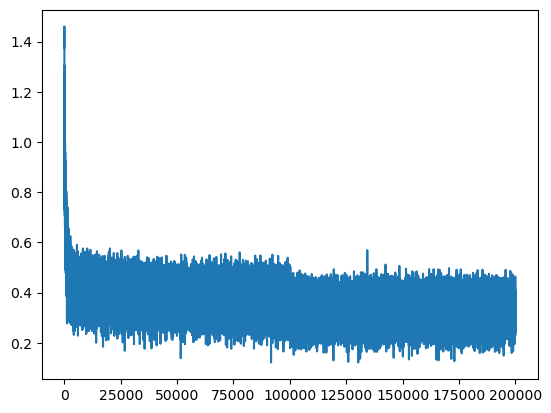

In [465]:
plt.plot(stepi, lossi)

In [466]:
emb = C[X_train]
h = torch.tanh(emb.view(-1,50) @ W1 +b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)

print(F.cross_entropy(logits, Y_train).data)

tensor(2.1629)


In [467]:
emb = C[X_val]
h = torch.tanh(emb.view(-1,50) @ W1 +b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)

print(F.cross_entropy(logits, Y_val).data)

tensor(2.1967)


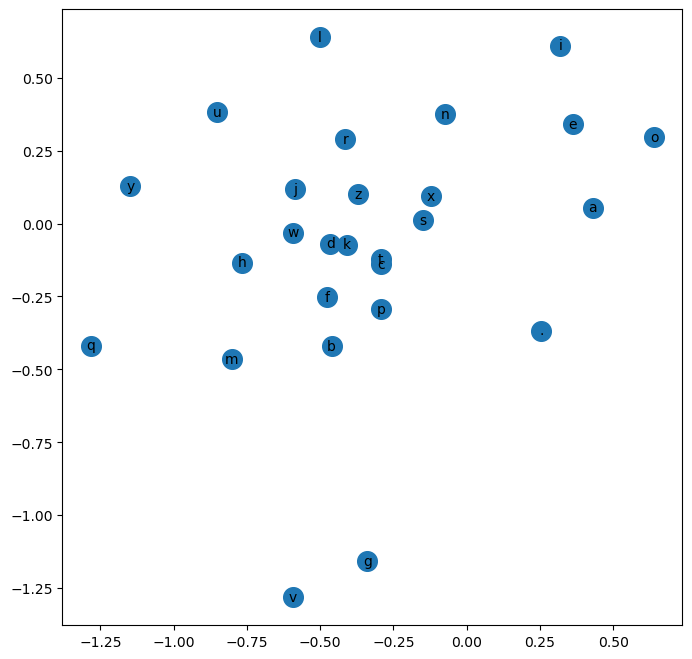

In [385]:
# visualization of embeddings
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s= 200)

for i in range(C.shape[0]): #27
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha = "center", va = "center")

## generating

In [482]:
for _ in range(10):
    out = []
    context = [0] * block_size
    while True:
        #forward pass
        emb = C[torch.tensor([context])] #embedd current context
        h = torch.tanh(emb.view(1,-1) @ W1 +b1) # (32, 100)
        logits = h @ W2 + b2 # (32, 27)
        probs = F.softmax(logits, dim= 1)
        ix = torch.multinomial(probs, num_samples = 1).item() #pick nach probability distribution
        context = context[1:] + [ix] #context verschiebe,
        out.append(ix)
        if ix == 0: #wenn punkt gezogen
            break

    print("".join(itos[i] for i in out))

hhelkon.
aisin.
sonzee.
oman.
mary.
zckary.
avelynn.
araiya.
chyron.
tryen.


In [469]:
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [485]:
C[torch.tensor([0,0,0,0,3])]

tensor([[ 0.5835, -1.7053,  1.5607, -2.8894, -1.9060,  0.9824, -2.6749,  0.1963,
         -2.3052, -0.6605],
        [ 0.5835, -1.7053,  1.5607, -2.8894, -1.9060,  0.9824, -2.6749,  0.1963,
         -2.3052, -0.6605],
        [ 0.5835, -1.7053,  1.5607, -2.8894, -1.9060,  0.9824, -2.6749,  0.1963,
         -2.3052, -0.6605],
        [ 0.5835, -1.7053,  1.5607, -2.8894, -1.9060,  0.9824, -2.6749,  0.1963,
         -2.3052, -0.6605],
        [ 0.1986,  0.2166,  0.8732,  0.7824, -0.9757,  0.1522,  0.2636,  0.6226,
          0.4394,  0.5522]], grad_fn=<IndexBackward0>)

# makemore part 3

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open("data/names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
#build vocabulary of character and mapping
chars = sorted(list(set("".join(words))))
stoi = {char: i+1 for i, char in enumerate(chars)}
stoi["."] = 0
itos = {i: char for char, i in stoi.items()}
vocab_size = len(itos)

In [4]:
#build the dataset
block_size = 3
def build_dataset(words):
    X = []
    Y = []
    for word in words:
        context = [0] * block_size
        
        for char in word + ".":
            idx = stoi[char]
            Y.append(idx)
            X.append(context)
            context = context[1:] + [idx]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.shuffle(words)
s1 = int(0.8 * len(words))
s2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:s1])
X_val, Y_val = build_dataset(words[s1:s2])
X_test, Y_test = build_dataset(words[s2:])


torch.Size([182542, 3]) torch.Size([182542])
torch.Size([22883, 3]) torch.Size([22883])
torch.Size([22721, 3]) torch.Size([22721])


-----

In [ ]:
# mlp
n_embd = 10
n_hidden = 200

C = torch.randn((vocab_size, n_embd)) * 0.1
W1 = torch.randn((n_embd*block_size), n_hidden) * ((5/3) / ((n_embd * block_size) **0.5)) # kaiming init
b1 = torch.randn(n_hidden) * 0.1
W2 = torch.randn((n_hidden, vocab_size)) * ((5/3) / ((n_hidden) **0.5))
b2 = torch.randn(vocab_size) * 0.1

bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))

bnmean_running = torch.ones((1, n_hidden))
bnstd_running = torch.zeros((1, n_hidden))

parameters = [C, W1, b1, W2, b2, bngain, bnbias]
for p in parameters:
    p.requires_grad = True
print(sum(p.nelement() for p in parameters))

12297


In [ ]:
#training
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
    ix = torch.randint(0, X_train.shape[0], (batch_size,))
    Xb, Yb = X_train[ix], Y_train[ix]

    #forward pass
    emb = C[Xb]
    embcat = emb.view(-1, n_embd*block_size)
    hpreact = embcat @ W1 + b1 # hidden layer preactivation
    # batchnorm layer
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.std(0, keepdim=True)
    hpreact = bngain * (hpreact - bnmeani) / bnstdi + bnbias 
    #batch normalization: normalverteilt mit unit variance at initalization -> gain/bias change during backprop
    
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.1 if i > 50000 else 0.01
    for p in parameters:
        p.data = p.data - lr * p.grad

    #track stats
    if i % 10000 == 0:
        print(f"{i:7d}/{max_steps:7d}: {loss.item():.4f}")
    lossi.append(loss.log10().item())


      0/ 200000: 3.6693
  10000/ 200000: 2.1814
  20000/ 200000: 2.4741
  30000/ 200000: 2.6222
  40000/ 200000: 2.0225
  50000/ 200000: 2.1924
  60000/ 200000: 2.3652
  70000/ 200000: 1.9423
  80000/ 200000: 2.7003
  90000/ 200000: 2.4203
 100000/ 200000: 2.3244
 110000/ 200000: 3.0555
 120000/ 200000: 1.9284
 130000/ 200000: 2.2354
 140000/ 200000: 1.9641
 150000/ 200000: 2.1213
 160000/ 200000: 2.3851
 170000/ 200000: 2.2943
 180000/ 200000: 2.0767
 190000/ 200000: 2.2262


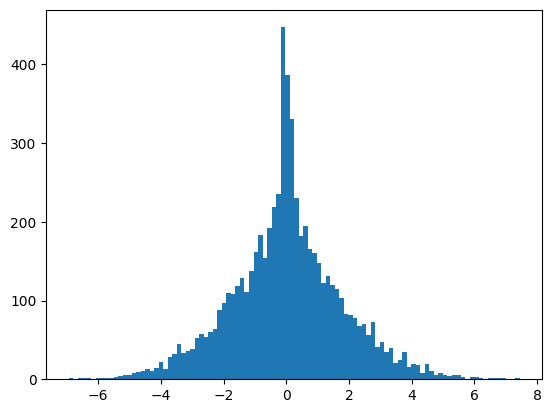

In [119]:
# verteilung vor aktivierung
plt.hist(hpreact.view(1,-1).tolist(), 100);

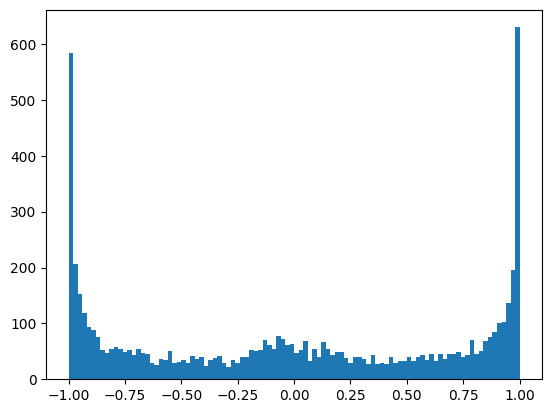

In [120]:
#verteilung nach aktivierung durcn tanh
plt.hist(h.view(1, -1).tolist(), 100);

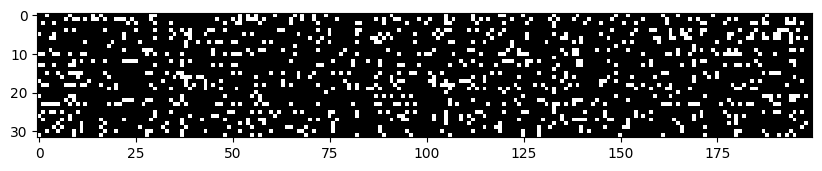

In [121]:
plt.figure(figsize = ((10,10)))
plt.imshow(h.abs() > 0.99, cmap = "grey")

In [20]:
@torch.no_grad
def split_loss(split):
    x,y = {
        "train": (X_train, Y_train),
        "val": (X_val, Y_val),
        "test": (X_test, Y_test)
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1 + b1
    # hpreact = bngain * (hpreact - (hpreact.mean(0, keepdim=True)) / hpreact.std(0, keepdim=True)) + bnbias
    hpreact = bngain * ((hpreact - bnmean_running) / bnstd_running) + bnbias  
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss("train")
split_loss("val")

train 2.1424660682678223
val 2.158132553100586


In [27]:
# sample from the model

for _ in range(10):
    out = []
    context = [0] * block_size
    while True:
        #forward pass 
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
        
    print("".join(itos[i] for i in out))

kein.
lyonneelon.
karandett.
newoznanalshayah.
alleaghn.
nelinn.
jattynn.
esinzonnalana.
feodena.
kehhdannayden.


## better structure + pytorchify

In [ ]:
class Linear:
    def __init__(self, fan_in, fan_out, bias = True):
        self.weight = torch.randn((fan_in, fan_out)) / fan_in ** 0.5 #kaiming init
        self.bias = torch.zeros(fan_out) if bias else None

    def __call__(self, x): # output = layer1(X)
        self.out = x @ self.weight
        if self.bias is not None:
            self.out = self.out + self.bias
        return self.out
    
    def parameters(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])

class BatchNorm1d:
    def __init__(self, dim, eps = 1e-5, momentum = 0.1):
        self.eps = eps
        self.momentum = momentum
        self.Training = True
        #parameters to be trained during backprop
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
        #buffers - trained with momentum (not backprop)
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)
    
    def __call__(self, x):
        #calculate forward pass
        if self.Training:
            xmean = x.mean(0, keepdim = True)
            xvar = x.var(0, keepdim = True)
        else: 
            xmean = self.running_mean
            xvar = self.running_var
        xhat = (x-xmean) / torch.sqrt(xvar + self.eps)
        self.out = self.gamma * xhat + self.beta
        #update buffers
        if self.Training:
            with torch.no_grad():
                self.running_mean = (1-self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1-self.momentum) * self.running_var + self.momentum * xvar
        return self.out
    
    def parameters(self):
        return [self.gamma, self.beta]
    
class Tanh:
    def __call__(self, x):
        self.out = torch.tanh(x)
        return self.out
    def parameters(self):
        return []
    
#------- buidling mlp -----

n_embd = 10
n_hidden = 100

C = torch.randn(vocab_size, n_embd)
layers = [
    Linear(n_embd * block_size, n_hidden),
    BatchNorm1d(n_hidden),
    Tanh(),
    Linear(n_hidden, n_hidden),
    BatchNorm1d(n_hidden),
    Tanh(),
    Linear(n_hidden, n_hidden),
    BatchNorm1d(n_hidden),
    Tanh(),
    Linear(n_hidden, n_hidden),
    BatchNorm1d(n_hidden),
    Tanh(),
    Linear(n_hidden, n_hidden),
    BatchNorm1d(n_hidden),
    Tanh(),
    Linear(n_hidden, vocab_size),
    BatchNorm1d(vocab_size),
]
    
with torch.no_grad():
    #make last layer less confident
    layers[-1].gamma *= 0.1
    #for all other layers: apply gain
    for layer in layers[:-1]:
        if isinstance(layer, Linear):
            layer.weight *= 5/3
    
parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True    


47551


In [28]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
    ix = torch.randint(0, X_train.shape[0], (batch_size,))
    Xb, Yb = X_train[ix], Y_train[ix]
    
    #forward pass
    emb = C[Xb]
    x = emb.view(emb.shape[0], -1)
    for layer in layers:
        x = layer(x)
    loss = F.cross_entropy(x, Yb)

    #backward pass
    for layer in layers:
        layer.out.retain_grad()
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.1 if i < 50000 else 0.01
    for p in parameters:
        p.data = p.data - lr * p.grad

    #track stats
    if i % 10000 == 0:
        print(f"{i:7d}/{max_steps:7d}: {loss.item():.4f}")
    lossi.append(loss.log10().item())

    break

      0/ 200000: 3.2537
